In [1]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from scipy.stats import linregress

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
regional_data_df = pd.read_csv("Data_processed/cleaned_regional_data.csv")

# Display sample data
regional_data_df.head()

,Unnamed: 0,la_name,gender,total_num_schools,total_num_pupils,avg_attainment8_score,avg_progress8_score,perc_achieving_grade_5to9_eng_maths
0,0,Hartlepool,Boys,6,568,38.5,-0.64,34.3
1,1,Hartlepool,Girls,6,523,44.2,-0.27,41.1
2,2,Hartlepool,Total,6,1091,41.2,-0.46,37.6
3,3,Middlesbrough,Boys,10,791,37.2,-0.64,31.2
4,4,Middlesbrough,Girls,9,809,42.8,-0.29,36.6


In [3]:
regional_total_df = regional_data_df[regional_data_df['gender'] ==  'Total']
regional_total_df.head()

,Unnamed: 0,la_name,gender,total_num_schools,total_num_pupils,avg_attainment8_score,avg_progress8_score,perc_achieving_grade_5to9_eng_maths
2,2,Hartlepool,Total,6,1091,41.2,-0.46,37.6
5,5,Middlesbrough,Total,10,1600,40.0,-0.46,33.9
8,8,Redcar and Cleveland,Total,13,1586,45.2,-0.33,45.0
11,11,Stockton-on-Tees,Total,15,2269,45.8,-0.18,47.2
14,14,Darlington,Total,9,1148,46.2,-0.20,46.3


In [4]:
regional_boys_df = regional_data_df[regional_data_df['gender'] ==  'Boys']
regional_boys_df.head()

,Unnamed: 0,la_name,gender,total_num_schools,total_num_pupils,avg_attainment8_score,avg_progress8_score,perc_achieving_grade_5to9_eng_maths
0,0,Hartlepool,Boys,6,568,38.5,-0.64,34.3
3,3,Middlesbrough,Boys,10,791,37.2,-0.64,31.2
6,6,Redcar and Cleveland,Boys,13,823,43.2,-0.45,44.0
9,9,Stockton-on-Tees,Boys,15,1131,44.3,-0.30,46.4
12,12,Darlington,Boys,9,561,43.6,-0.35,42.6


In [5]:
regional_girls_df = regional_data_df[regional_data_df['gender'] ==  'Girls']
regional_girls_df.head()

,Unnamed: 0,la_name,gender,total_num_schools,total_num_pupils,avg_attainment8_score,avg_progress8_score,perc_achieving_grade_5to9_eng_maths
1,1,Hartlepool,Girls,6,523,44.2,-0.27,41.1
4,4,Middlesbrough,Girls,9,809,42.8,-0.29,36.6
7,7,Redcar and Cleveland,Girls,13,763,47.3,-0.19,46.1
10,10,Stockton-on-Tees,Girls,15,1138,47.3,-0.06,48.1
13,13,Darlington,Girls,9,587,48.7,-0.06,49.7


In [6]:
regional_total_att8_df = regional_total_df[['la_name','avg_attainment8_score']]
regional_total_att8_df = regional_total_att8_df.sort_values(by="avg_attainment8_score", ascending=False)

regional_total_att8_df.head()

,la_name,avg_attainment8_score
380,Sutton,59.8
356,Kingston upon Thames,58.5
302,Barnet,57.0
215,Trafford,56.9
374,Richmond upon Thames,55.8


C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


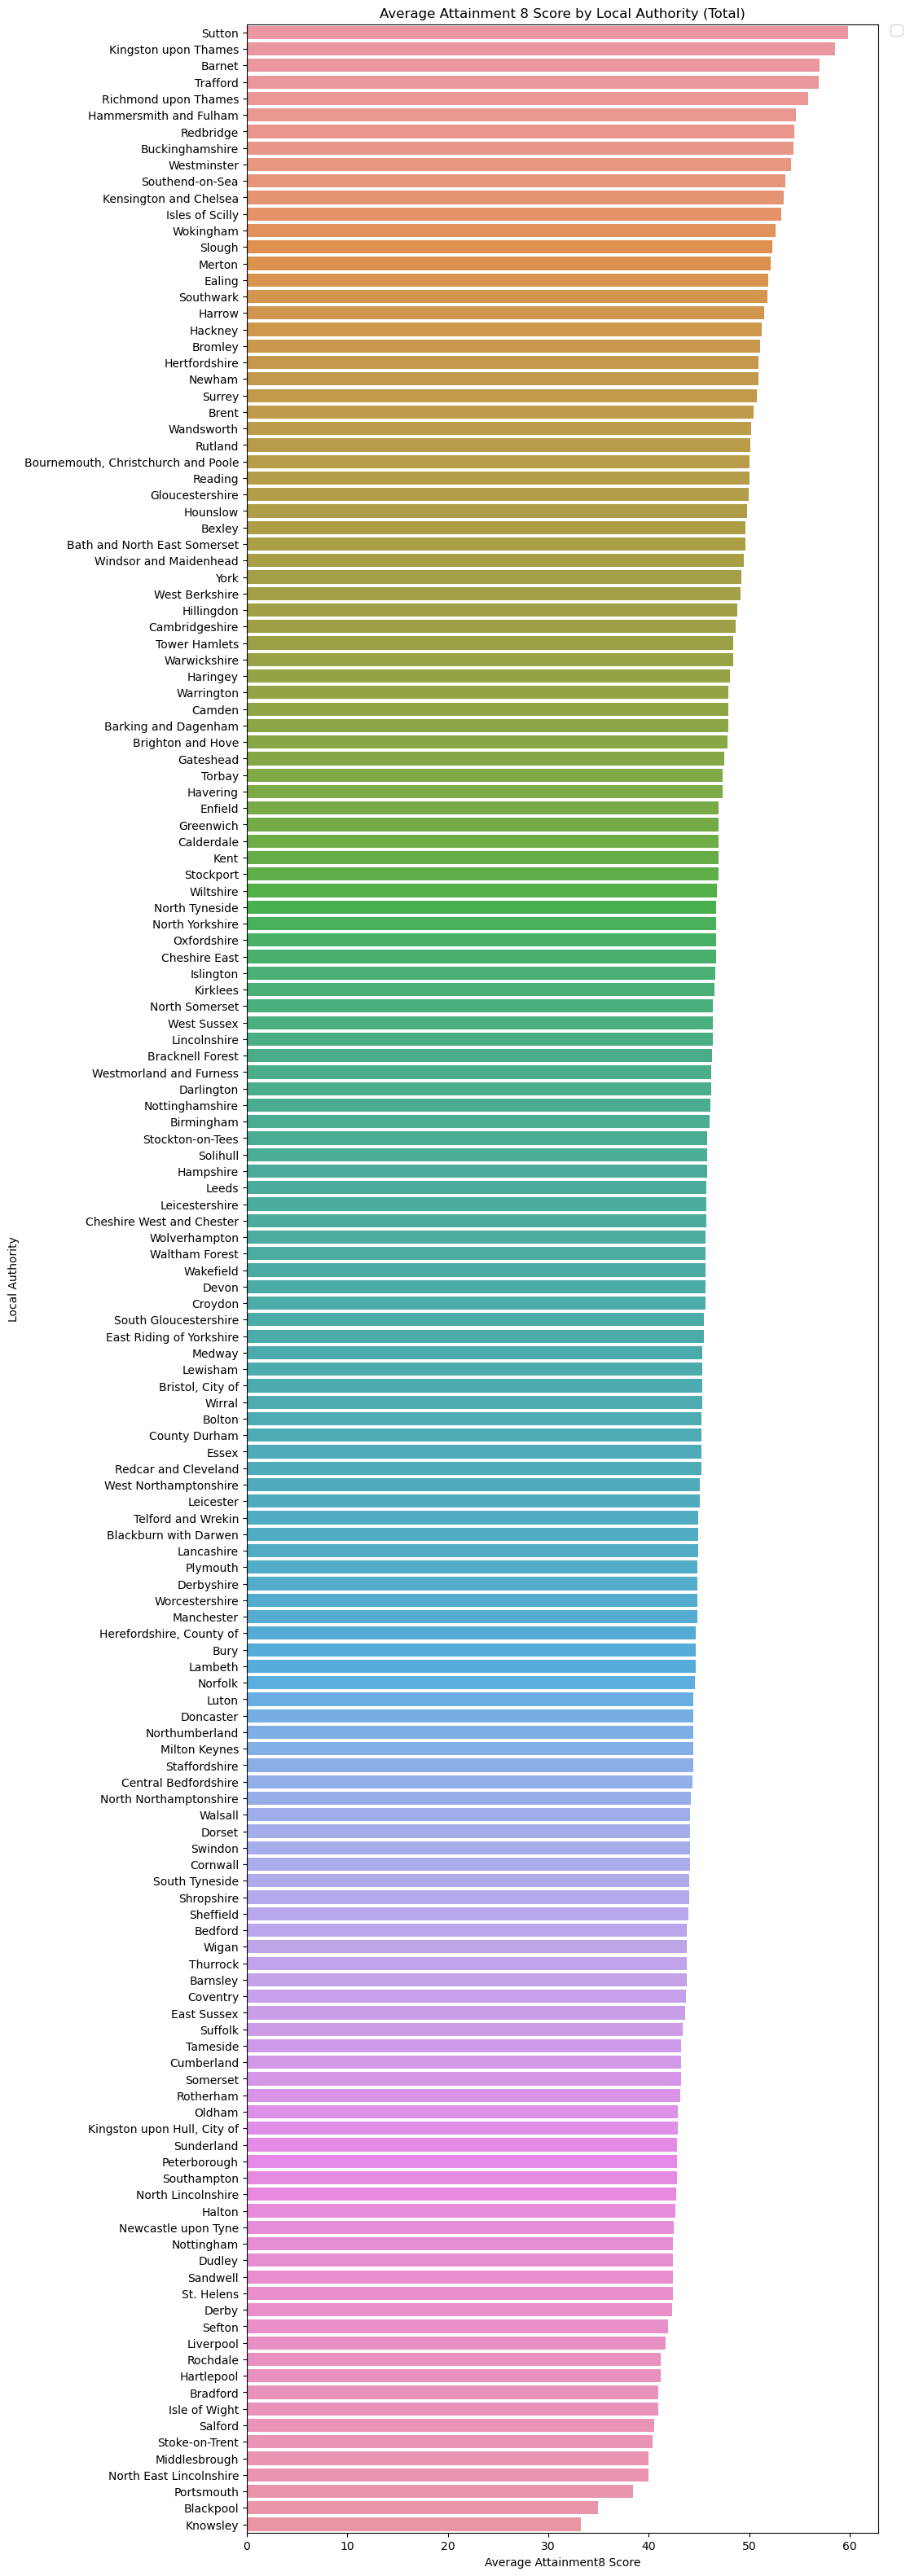

In [7]:
plt.figure(figsize=(10, 40))
plt.title('Average Attainment 8 Score by Local Authority (Total)')
sns.barplot(x="avg_attainment8_score", 
            y="la_name", 
            data=regional_total_att8_df,
           )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=13)
plt.xlabel('Average Attainment8 Score')
plt.ylabel('Local Authority')

# Save the figure as a PNG file
plt.savefig("Graphs/Q4_regional_bar_total.png", bbox_inches="tight")

plt.show()

In [8]:
regional_boys_att8_df = regional_boys_df[['la_name','avg_attainment8_score']]
regional_boys_att8_df = regional_boys_att8_df.sort_values(by="avg_attainment8_score", ascending=False)
regional_boys_att8_df.head()

,la_name,avg_attainment8_score
378,Sutton,58.7
147,Isles of Scilly,56.6
354,Kingston upon Thames,56.3
300,Barnet,55.7
213,Trafford,55.1


C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


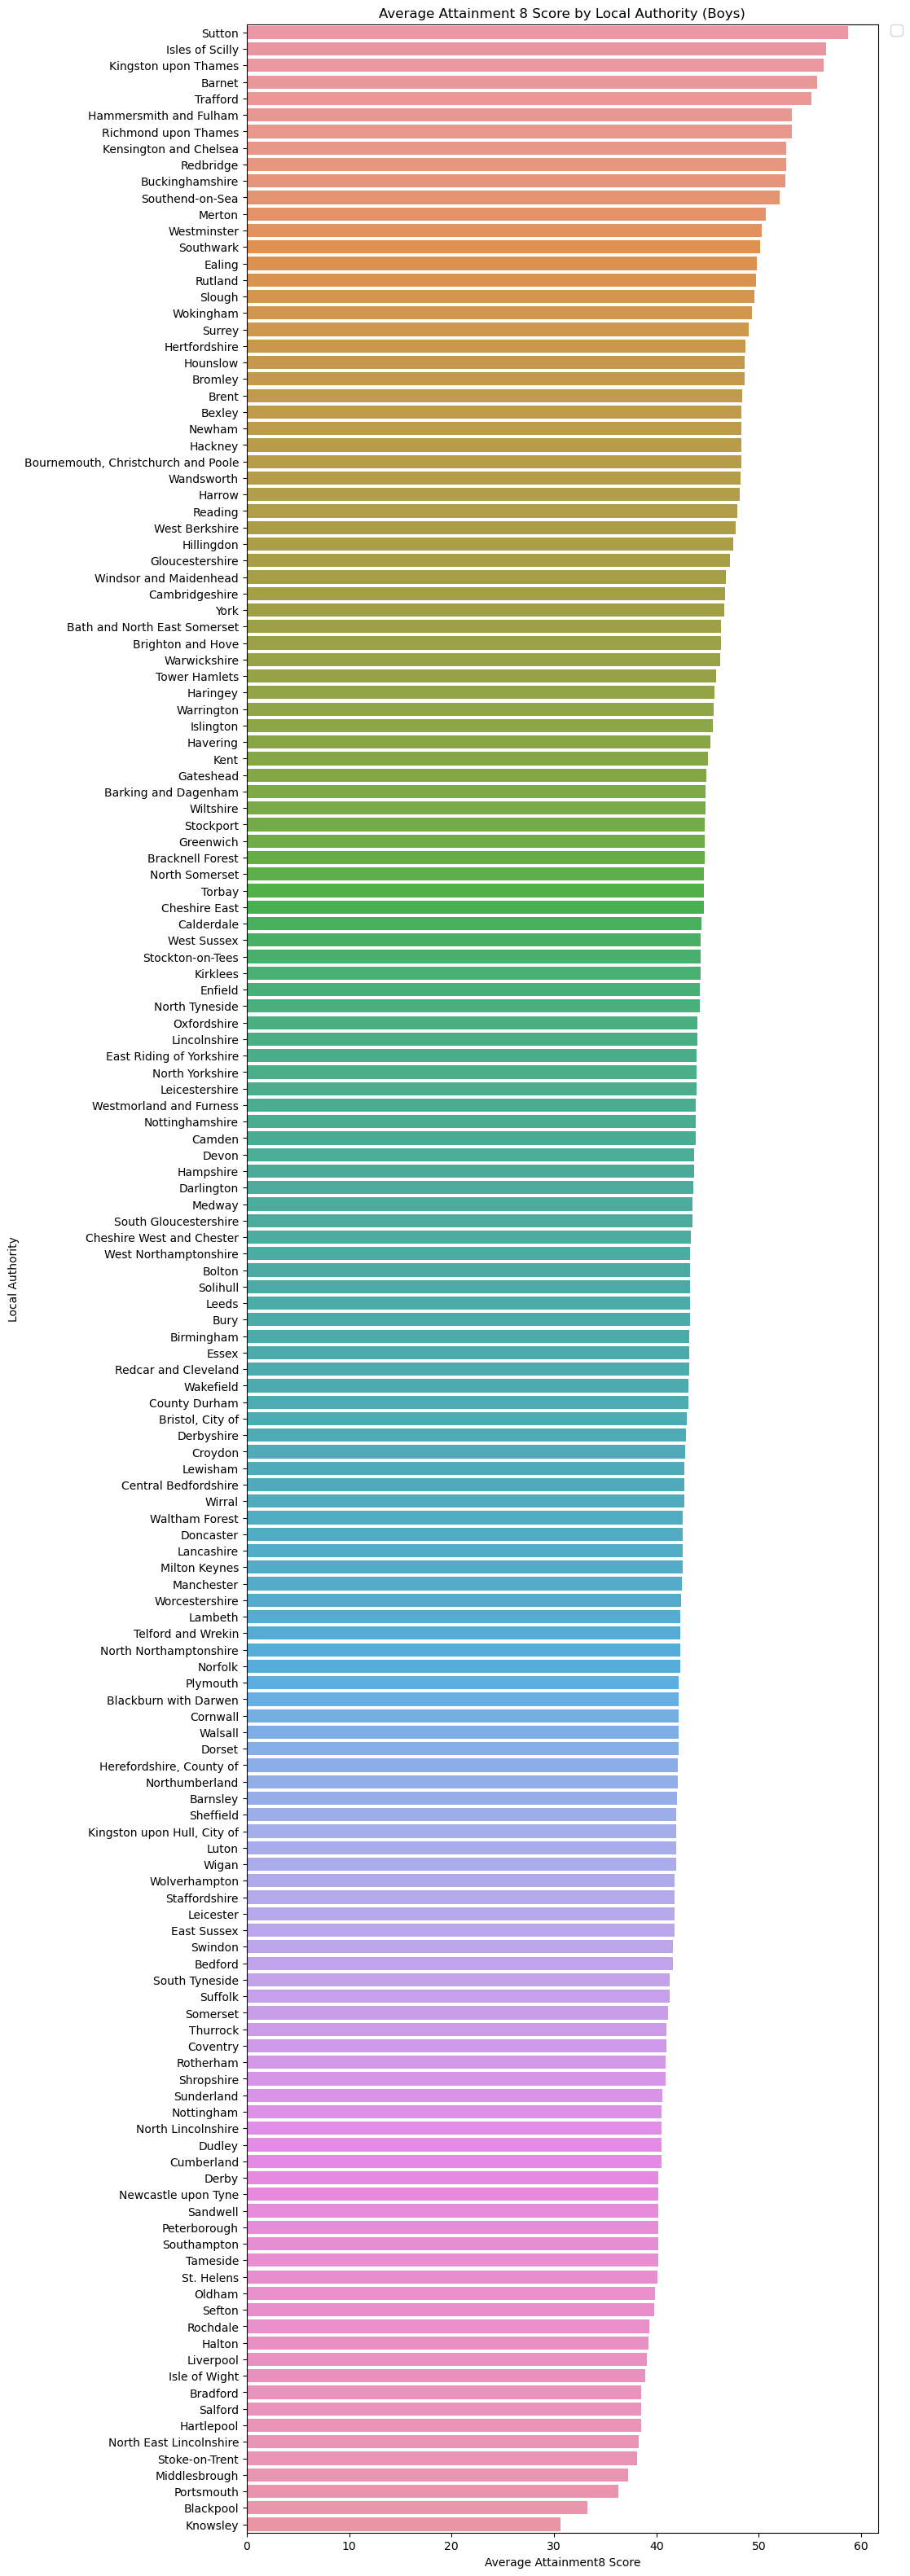

In [9]:
plt.figure(figsize=(10, 40))
plt.title('Average Attainment 8 Score by Local Authority (Boys)')
sns.barplot(x="avg_attainment8_score", 
            y="la_name", 
            data=regional_boys_att8_df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=13)
plt.ylabel("Local Authority")
plt.xlabel("Average Attainment8 Score")

# Save the figure as a PNG file
plt.savefig("Graphs/Q4_regional_bar_boys.png", bbox_inches="tight")

plt.show()

In [10]:
regional_girls_att8_df = regional_girls_df[['la_name','avg_attainment8_score']]
regional_girls_att8_df = regional_girls_att8_df.sort_values(by="avg_attainment8_score", ascending=False)
regional_girls_att8_df.head()

,la_name,avg_attainment8_score
379,Sutton,61.0
355,Kingston upon Thames,60.5
214,Trafford,58.8
373,Richmond upon Thames,58.5
301,Barnet,58.4


C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


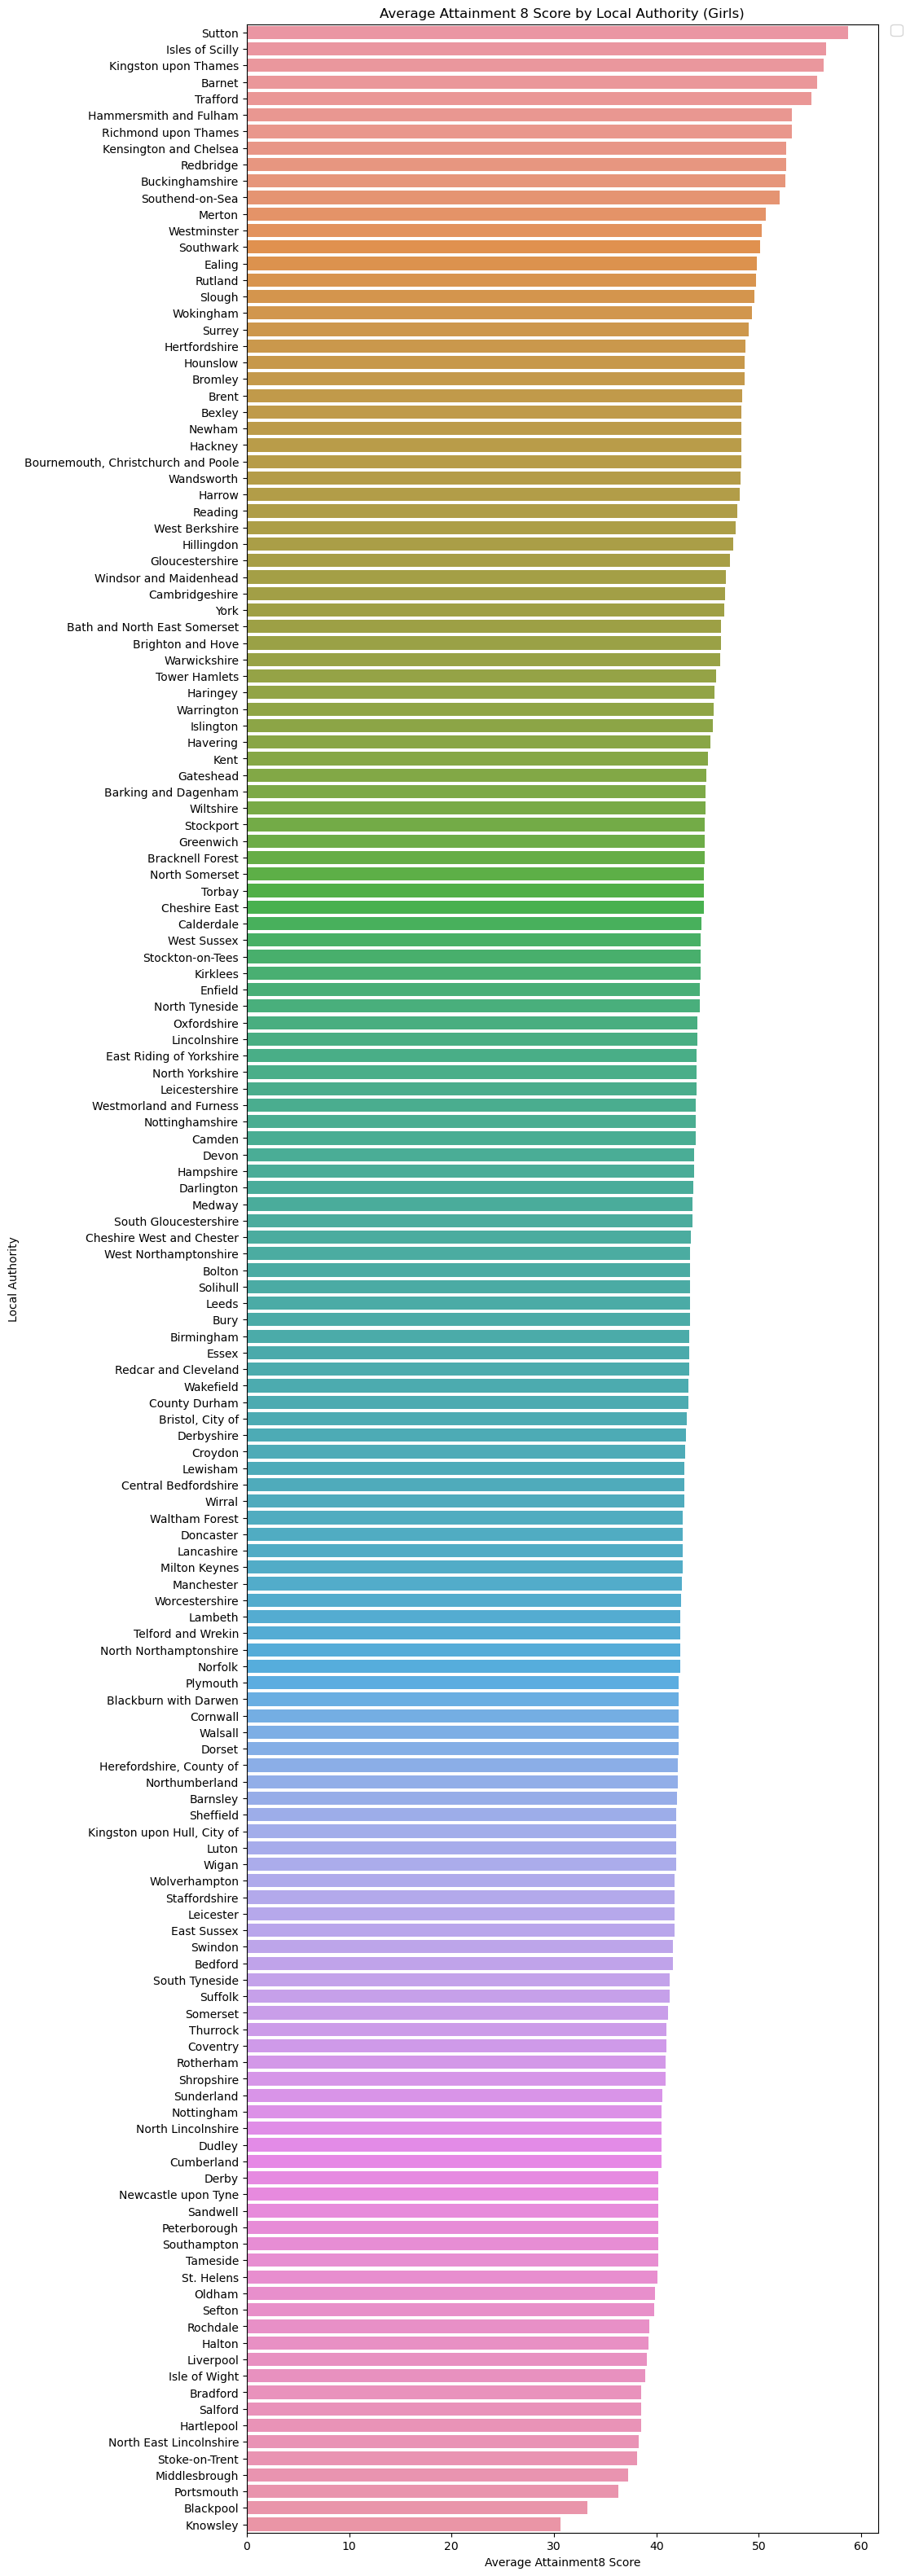

In [11]:
plt.figure(figsize=(10, 40))
plt.title('Average Attainment 8 Score by Local Authority (Girls)')
sns.barplot(x="avg_attainment8_score", 
            y="la_name", 
            data=regional_boys_att8_df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=13)
plt.ylabel("Local Authority")
plt.xlabel("Average Attainment8 Score")

# Save the figure as a PNG file
plt.savefig("Graphs/Q4_regional_bar_girls.png", bbox_inches="tight")

plt.show()

In [12]:
regional_gender = ["Total","Boys","Girls"]
regional_box = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for genders in regional_gender:
    
    regional_plot = regional_data_df.loc[regional_data_df['gender'] == genders, 'avg_attainment8_score']
    
    regional_box.append(regional_plot)
    
    quartiles = regional_plot.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = regional_plot[(regional_plot < lower_bound) | (regional_plot > upper_bound)]

    print(f"The interquartile range of {genders} is: {round(iqr, 2)}")
    print(f"The lower quartile of {genders} is: {round(lower_bound, 2)}")
    print(f"The upper quartile of {genders} is: {round(upper_bound, 2)}")
    print(f"{genders}'s potential outliers: {outliers}")

The interquartile range of Total is: 4.42
The lower quartile of Total is: 37.34
The upper quartile of Total is: 55.04
Total's potential outliers: 26     34.9
215    56.9
221    33.2
302    57.0
356    58.5
374    55.8
380    59.8
Name: avg_attainment8_score, dtype: float64
The interquartile range of Boys is: 4.43
The lower quartile of Boys is: 35.16
The upper quartile of Boys is: 52.86
Boys's potential outliers: 24     33.3
147    56.6
213    55.1
219    30.6
300    55.7
330    53.2
354    56.3
372    53.2
378    58.7
Name: avg_attainment8_score, dtype: float64
The interquartile range of Girls is: 4.42
The lower quartile of Girls is: 39.46
The upper quartile of Girls is: 57.16
Girls's potential outliers: 25     36.7
214    58.8
220    36.0
301    58.4
355    60.5
373    58.5
379    61.0
391    57.6
Name: avg_attainment8_score, dtype: float64


C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

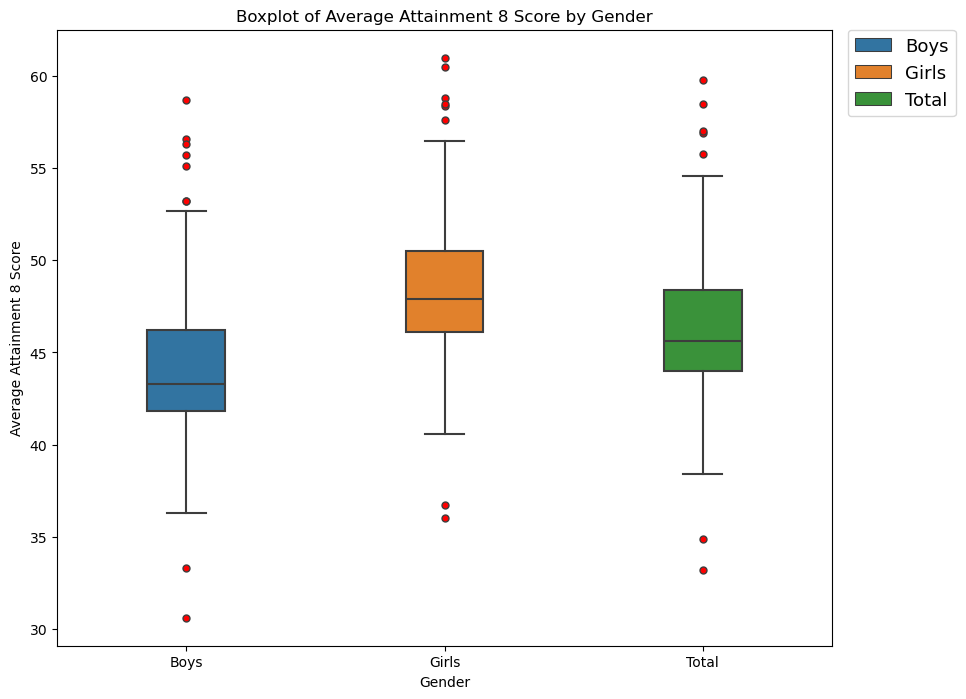

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=regional_data_df, 
            x='gender', 
            y='avg_attainment8_score', 
            hue='gender', 
            dodge=False,
            width=0.3,
            flierprops=dict(markerfacecolor='r', marker='o'))

plt.title('Boxplot of Average Attainment 8 Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Attainment 8 Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=13)

# Save the figure as a PNG file
plt.savefig("Graphs/Q4_regional_boxplot_a8.png", bbox_inches="tight")

plt.show()

In [14]:
regional_gender = ["Total","Boys","Girls"]
regional_box_p8 = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for genders in regional_gender:
    
    regional_plot_p8 = regional_data_df.loc[regional_data_df['gender'] == genders, 'avg_progress8_score']
    
    regional_box_p8.append(regional_plot_p8)
    
    quartiles = regional_plot_p8.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = regional_plot_p8[(regional_plot_p8 < lower_bound) | (regional_plot_p8 > upper_bound)]

    print(f"The interquartile range of {genders} is: {round(iqr, 2)}")
    print(f"The lower quartile of {genders} is: {round(lower_bound, 2)}")
    print(f"The upper quartile of {genders} is: {round(upper_bound, 2)}")
    print(f"{genders}'s potential outliers: {outliers}")

The interquartile range of Total is: 0.3
The lower quartile of Total is: -0.63
The upper quartile of Total is: 0.57
Total's potential outliers: 26    -0.86
149    0.73
221   -0.90
302    0.64
308    0.61
320    0.62
356    0.58
365    0.58
Name: avg_progress8_score, dtype: float64
The interquartile range of Boys is: 0.27
The lower quartile of Boys is: -0.72
The upper quartile of Boys is: 0.37
Boys's potential outliers: 24    -0.98
147    1.00
219   -1.08
300    0.56
306    0.48
318    0.49
330    0.42
354    0.43
363    0.52
369    0.40
378    0.42
Name: avg_progress8_score, dtype: float64
The interquartile range of Girls is: 0.32
The lower quartile of Girls is: -0.51
The upper quartile of Girls is: 0.76
Girls's potential outliers: 25    -0.71
220   -0.71
307    0.76
319    0.76
Name: avg_progress8_score, dtype: float64


C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

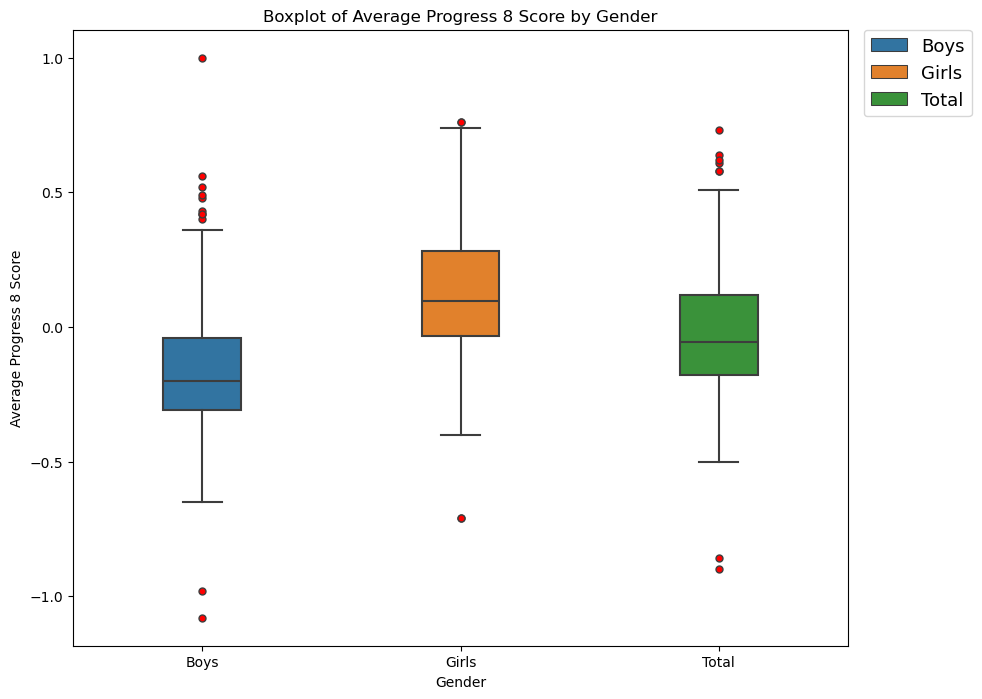

In [15]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=regional_data_df, 
            x='gender', 
            y='avg_progress8_score', 
            hue='gender', 
            dodge=False,
            width=0.3,
            flierprops=dict(markerfacecolor='r', marker='o'))

plt.title('Boxplot of Average Progress 8 Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Progress 8 Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=13)

# Save the figure as a PNG file
plt.savefig("Graphs/Q4_regional_boxplot_p8.png", bbox_inches="tight")

plt.show()

In [16]:
# Use the Pandas copy function to create DataFrame
regional_map_df = regional_total_df[['la_name','avg_attainment8_score','avg_progress8_score']].copy()

# Add an empty column
regional_map_df['latitude'] = ""
regional_map_df['longitude'] = ""

# Display sample data
regional_map_df

,la_name,avg_attainment8_score,avg_progress8_score,latitude,longitude
2,Hartlepool,41.2,-0.46,,
5,Middlesbrough,40.0,-0.46,,
8,Redcar and Cleveland,45.2,-0.33,,
11,Stockton-on-Tees,45.8,-0.18,,
14,Darlington,46.2,-0.20,,
...,...,...,...,...,...
443,Suffolk,43.4,-0.10,,
446,Surrey,50.7,0.17,,
449,Warwickshire,48.4,0.05,,
452,West Sussex,46.4,0.05,,


In [17]:
# Set base URL for Geoapify Geocoding API
base_url = 'https://api.geoapify.com/v1/geocode/search'

cities = regional_total_df['la_name'].tolist()

# Specify the country
country_code = 'GB'

# Iterate through the cities
for city in cities:
    params = {
        'text': city,
        'apiKey': geoapify_key,
        'country': country_code,
    }
    
    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    result = response.json()

    if result.get('features'):
        coordinates = result['features'][0]['geometry']['coordinates']
        regional_map_df.loc[regional_map_df['la_name'] == city, 'latitude'] = coordinates[1]
        regional_map_df.loc[regional_map_df['la_name'] == city, 'longitude'] = coordinates[0]
        print(f'{city}: Latitude={coordinates[1]}, Longitude={coordinates[0]}')
    else:
        pass
        
# Display sample data
regional_map_df

Hartlepool: Latitude=54.6857276, Longitude=-1.2093696
Middlesbrough: Latitude=54.5760419, Longitude=-1.2344047
Redcar and Cleveland: Latitude=54.5679056, Longitude=-1.0054963165760897
Stockton-on-Tees: Latitude=54.564094, Longitude=-1.3129164
Darlington: Latitude=54.5242081, Longitude=-1.5555812
Halton: Latitude=53.35385255, Longitude=-2.7427828785393507
Warrington: Latitude=53.3899497, Longitude=-2.5943178
Blackburn with Darwen: Latitude=53.699176949999995, Longitude=-2.4709000953138327
Blackpool: Latitude=53.8179442, Longitude=-3.0509812
Kingston upon Hull, City of: Latitude=53.7435722, Longitude=-0.3394758
East Riding of Yorkshire: Latitude=53.9112323, Longitude=-0.5813105
North East Lincolnshire: Latitude=53.53680335, Longitude=-0.09368101348534888
North Lincolnshire: Latitude=53.589744100000004, Longitude=-0.6023230295256561
York: Latitude=53.9590555, Longitude=-1.0815361
Derby: Latitude=52.9212617, Longitude=-1.4761491
Leicester: Latitude=52.6362, Longitude=-1.1331969
Rutland: La

,la_name,avg_attainment8_score,avg_progress8_score,latitude,longitude
2,Hartlepool,41.2,-0.46,54.685728,-1.20937
5,Middlesbrough,40.0,-0.46,54.576042,-1.234405
8,Redcar and Cleveland,45.2,-0.33,54.567906,-1.005496
11,Stockton-on-Tees,45.8,-0.18,54.564094,-1.312916
14,Darlington,46.2,-0.20,54.524208,-1.555581
...,...,...,...,...,...
443,Suffolk,43.4,-0.10,52.241001,1.046683
446,Surrey,50.7,0.17,51.271532,-0.341452
449,Warwickshire,48.4,0.05,52.321306,-1.553691
452,West Sussex,46.4,0.05,51,-0.416667


In [18]:
# Configure the map plot
uk_map_a8_plot = regional_map_df.hvplot.points(
    'longitude',
    'latitude',
    color='avg_attainment8_score',
    geo=True,
    tiles="OSM",
    size='avg_attainment8_score',
    frame_width=800,
    frame_height=700,
    xlabel='Longitude',
    ylabel='Latitude',
    scale=2,
    cmap='hsv',
    title='Average attainment 8 distribution'
)

#display the map
uk_map_a8_plot

C:\Users\User\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (avg_attainment8_score)

In [19]:
# Configure the map plot
uk_map_p8_plot = regional_map_df.hvplot.points(
    'longitude',
    'latitude',
    color='avg_progress8_score',
    geo=True,
    tiles="OSM",
    size='avg_progress8_score',
    frame_width=800,
    frame_height=700,
    xlabel='Longitude',
    ylabel='Latitude',
    scale=30,
    cmap='hsv',
    title='Average progress 8 distribution'
)


#display the map
uk_map_p8_plot

C:\Users\User\anaconda3\envs\dev\lib\site-packages\holoviews\util\transform.py:672: RuntimeWarning: invalid value encountered in sqrt
  data = fn(*args, **kwargs)


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (avg_progress8_score)

In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    non_nan_mask = ~pd.isna(x_values) & ~pd.isna(y_values)
    x_values = x_values[non_nan_mask]
    y_values = y_values[non_nan_mask]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Average Attainmnet 8 Score')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")

In [21]:
employ_df = pd.read_csv("Data_processed/employment_data_for_local_authorities.csv")
employ_df = employ_df.rename(columns= {"Local authority" : "la_name"})
employ_df

,Unnamed: 0,la_name,Employment history,Number of people
0,3,Hartlepool,Not in employment: Never worked,12083
1,7,Middlesbrough,Not in employment: Never worked,21446
2,11,Redcar and Cleveland,Not in employment: Never worked,15841
3,15,Stockton-on-Tees,Not in employment: Never worked,20945
4,19,Darlington,Not in employment: Never worked,10345
...,...,...,...,...
326,1307,Torfaen,Not in employment: Never worked,7862
327,1311,Monmouthshire,Not in employment: Never worked,5849
328,1315,Newport,Not in employment: Never worked,15124
329,1319,Powys,Not in employment: Never worked,8517


In [22]:
employ_regional_total_a8_df = pd.merge(regional_total_att8_df, employ_df, how = "left", on = "la_name")
employ_regional_total_a8_df = employ_regional_total_a8_df.drop(columns = ["Unnamed: 0", "Employment history"])
employ_regional_total_a8_df

,la_name,avg_attainment8_score,Number of people
0,Sutton,59.8,16487.0
1,Kingston upon Thames,58.5,13764.0
2,Barnet,57.0,41107.0
3,Trafford,56.9,18738.0
4,Richmond upon Thames,55.8,12608.0
...,...,...,...
147,Middlesbrough,40.0,21446.0
148,North East Lincolnshire,40.0,15494.0
149,Portsmouth,38.4,18579.0
150,Blackpool,34.9,15328.0


The r-squared is: 0.006064436570234539


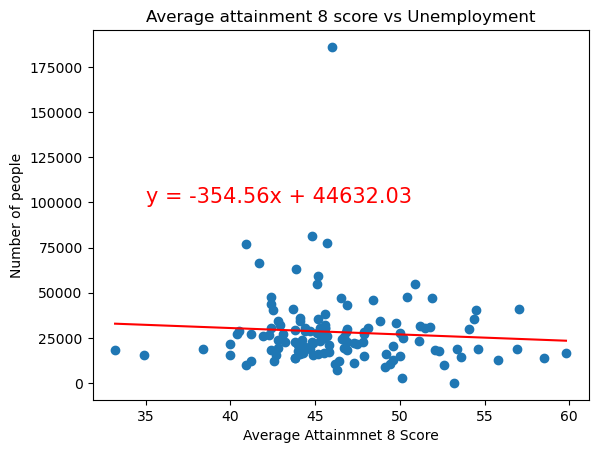

In [23]:
# Linear regression on total average attainment 8 score
x_values = employ_regional_total_a8_df['avg_attainment8_score']
y_values = employ_regional_total_a8_df['Number of people']
y_label = "Number of people"
plot_linear_regression(x_values, y_values, y_label, (35,100000))
plt.title('Average attainment 8 score vs Unemployment')

# Save the figure as a PNG file
plt.savefig("Graphs/Q4_regional_regress_employ.png", bbox_inches="tight")
plt.show()

In [24]:
qual_df = pd.read_csv("Data_processed/qualifications_data_for_local_authorities.csv")
qual_df = qual_df.rename(columns= {"Local authority" : "la_name"})
qual_df

,Unnamed: 0,la_name,Highest level of qualification,Number of people
0,1,Hartlepool,No qualifications,17286
1,9,Middlesbrough,No qualifications,27282
2,17,Redcar and Cleveland,No qualifications,24732
3,25,Stockton-on-Tees,No qualifications,29441
4,33,Darlington,No qualifications,16972
...,...,...,...,...
326,2609,Torfaen,No qualifications,16631
327,2617,Monmouthshire,No qualifications,12315
328,2625,Newport,No qualifications,27690
329,2633,Powys,No qualifications,21316


In [25]:
qual_regional_total_a8_df = pd.merge(regional_total_att8_df, qual_df, how = "left", on = "la_name")
qual_regional_total_a8_df = qual_regional_total_a8_df.drop(columns = ["Unnamed: 0", "Highest level of qualification"])
qual_regional_total_a8_df

,la_name,avg_attainment8_score,Number of people
0,Sutton,59.8,25122.0
1,Kingston upon Thames,58.5,16128.0
2,Barnet,57.0,47762.0
3,Trafford,56.9,25990.0
4,Richmond upon Thames,55.8,14163.0
...,...,...,...
147,Middlesbrough,40.0,27282.0
148,North East Lincolnshire,40.0,30907.0
149,Portsmouth,38.4,29766.0
150,Blackpool,34.9,28575.0


The r-squared is: 0.0509122235194194


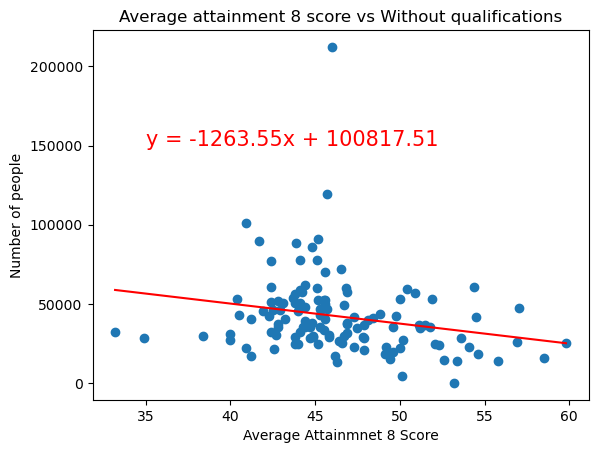

In [26]:
# Linear regression on total average attainment 8 score
x_values = qual_regional_total_a8_df['avg_attainment8_score']
y_values = qual_regional_total_a8_df['Number of people']
y_label = "Number of people"
plot_linear_regression(x_values, y_values, y_label, (35,150000))
plt.title('Average attainment 8 score vs Without qualifications')

# Save the figure as a PNG file
plt.savefig("Graphs/Q4_regional_regress_qual.png", bbox_inches="tight")
plt.show()